# Standard Monte Carlo vs Importance Sampling

In [71]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math

In Monte Carlo integration, the goal is to approximate some integral/expected value. Specifically, we try to approximate $E[g(X)]$ where the distribution function of $X$ is known, but computing $E[g(X)]$ analytically is impossible.

## Example 1

$$g(x) = 10 \exp(-5(x-3)^4)$$

If $X \sim N(0,1)$, then 
$$E[g(X)] \approx 0.089399237$$
according to Wolfram Alpha.

In [2]:
true_expected = 0.089399237

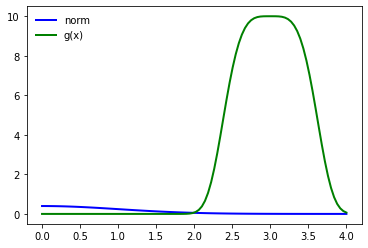

In [82]:
fig, ax = plt.subplots(1,1)
x_points = np.linspace(0, 4, 100)
ax.plot(x_points, norm.pdf(x_points), 'b', lw=2, label='norm')
ax.plot(x_points, 10*np.exp(-5*(x_points-3)**4), 'g', lw=2, label='g(x)')
ax.legend(loc='best', frameon=False)

### Standard Monte Carlo

Standard MC sampling involves drawing $n$ independent draws from the distribution $X$, computing $g(X)$ for each observation and then averaging these results to approximate $E[g(X)]$, i.e.,
$$E[g(X)] \approx \overline{g}_{X,n} = \frac{1}{n} \sum_{i=1}^n g(X_i)$$

If our approximation error is $\epsilon_n = \overline{g}_{X, n} - E[g(X)]$, then
$$Var[\epsilon_n] = \frac{1}{n} Var[g(X)].$$

In [3]:
np.random.seed(0)
mu, sigma, n = 0, 1, 1000
x = np.random.normal(mu, sigma, n)
g_x = 10*np.exp(-5*((x-3)**4))

In [4]:
mc_sample_mean = np.mean(g_x)
mc_sample_mean

0.07511998479759532

In [5]:
mc_variance = (1/n)*np.var(g_x)
mc_variance

0.00045308229094660003

### Importance Sampling

If our approximation error is $\epsilon_n = \overline{g}_{Y, n} - E[g(X)]$, then
$$Var[\epsilon_n] = \frac{1}{n} Var[\frac{p_X(Y)}{p_Y(Y)} g(Y)].$$

If we choose a random variable $Y$ whose pmf $p_Y(y) \propto p_X(y) g(y)$, then the variance of our approximation error is zero. Thus, we should choose a different distribution $p_Y(Y)$ that is alters the original distribution $X$ by increasing the probability at points where $g(y)$ are greater.

Since $g(x)$ peaks at $x=3$, then our altered random variable is 
$$Y \sim N(3, 1),$$
since this normal distribution has mean at $x=3$.

In [6]:
mu2, sigma2, n2 = 3, sigma, n
y = np.random.normal(mu2, sigma2, n2)
g_y = 10*np.exp(-5*((y-3)**4))
g_y_weighted = g_y*(norm.pdf(y, mu, sigma)/norm.pdf(y, mu2, sigma2))

In [7]:
is_sample_mean = np.mean(g_y_weighted)
is_sample_mean

0.08813692118635374

In [8]:
is_variance = (1/n)*np.var(g_y_weighted)
is_variance

1.322083627657519e-05

In [9]:
print("Approximation error magnitude of Monte Carlo: {}".format(abs(mc_sample_mean - true_expected)))
print("Approximation error magnitude of Importance Sampling: {}".format(abs(is_sample_mean - true_expected)))

Approximation error magnitude of Monte Carlo: 0.014279252202404683
Approximation error magnitude of Importance Sampling: 0.0012623158136462614


In [10]:
print("Approximation error variance of Monte Carlo: {}".format(mc_variance))
print("Approximation error variance of Importance Sampling: {}".format(is_variance))

Approximation error variance of Monte Carlo: 0.00045308229094660003
Approximation error variance of Importance Sampling: 1.322083627657519e-05


## Example 2


$$g(x) = \exp(-2(x+1)^2)$$

If $X \sim N(0,1)$, then 
$$E[g(X)] \approx 0.299776$$
according to Wolfram Alpha.

In [60]:
true_expected = 0.299776

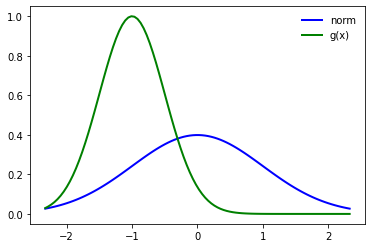

In [80]:
fig, ax = plt.subplots(1,1)
x_points = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x_points, norm.pdf(x_points), 'b', lw=2, label='norm')
ax.plot(x_points, np.exp(-2*(x_points+1)**2), 'g', lw=2, label='g(x)')
ax.legend(loc='best', frameon=False)

### Standard Monte Carlo

In [61]:
np.random.seed(0)
mu, sigma, n = 0, 1, 1000
x = np.random.normal(mu, sigma, n)
g_x = np.exp(-2*(x+1)**2)

In [62]:
mc_sample_mean = np.mean(g_x)
mc_sample_mean

0.31532890633790805

In [63]:
mc_variance = (1/n)*np.var(g_x)
mc_variance

0.00012587870076526114

### Importance Sampling

Since $g(x)$ peaks at $x=-1$, then our altered random variable is 
$$Y \sim N(-1, 1),$$
since this normal distribution peaks at $x=-1$.

In [64]:
mu2, sigma2, n2 = -1, sigma, n
y = np.random.normal(mu2, sigma2, n2)
g_y = np.exp(-2*(y+1)**2)
g_y_weighted = g_y*(norm.pdf(y, mu, sigma)/norm.pdf(y, mu2, sigma2))

In [65]:
is_sample_mean = np.mean(g_y_weighted)
is_sample_mean

0.3098926719415942

In [66]:
is_variance = (1/n)*np.var(g_y_weighted)
is_variance

6.522553032085177e-05

In [67]:
print("Approximation error magnitude of Monte Carlo: {}".format(abs(mc_sample_mean - true_expected)))
print("Approximation error magnitude of Importance Sampling: {}".format(abs(is_sample_mean - true_expected)))

Approximation error magnitude of Monte Carlo: 0.015552906337908068
Approximation error magnitude of Importance Sampling: 0.010116671941594213


In [68]:
print("Approximation error variance of Monte Carlo: {}".format(mc_variance))
print("Approximation error variance of Importance Sampling: {}".format(is_variance))

Approximation error variance of Monte Carlo: 0.00012587870076526114
Approximation error variance of Importance Sampling: 6.522553032085177e-05


Note that both approximation error and approximation error variance are much lower for importance sampling when compared to standard Monte Carlo sampling.